# Water balance and crop simulations with AgmetPy

AgmetPy implements a whole set of classes to calculate soil water balance and simulate the growth and development of crops with an object-oriented approach.

## Soil

An instance of the class `Soil` represents a soil. The characteristics of any particular soil as well as its current state are represented by the following properties:

- `theta`: represents the current soil moisture, in m³/m³.
- `theta_sat`: the soil moisture (m³/m³) at saturation (i.e., when all pores of the soil are filled with water).
- `theta_fc`: the soil moisture at field capacity (m³/m³).
- `theta_wp`: the soil moisture at wilting point (m³/m³).
- `ksat`: saturated hydraulic conductivity, in m/s. Currently there is no default value, so the user must provide a value,
but in future versions a default value will be provided based on the soil characteristics.
- `p`: the $p$ coefficient needed to calculate the threshold moisture below which a decrease of soil moisture will cause
a reduction of evapotranspiration (c.f. Allen et al., 1998). `p` will become a property of the class `Crop` in future
versions of AgmetPy, in order to meet the guidelines of Allen et al. (1998).
- `dz`: a single float number indicating the thickness of soil layers. The default value is 0.1 m.
- `pe`: like $p$, but for soil evaporation. The default value is 0.3.
- `ze`: the thickness of the evaporating layer. The default value is 0.1 m.

For a soil to be valid, the following constraints must be met:
0 < `theta_wp` < `theta_fc` < `theta_sat` < 1
and
0 ≤ `theta` ≤ `theta_sat`

## Crop

Crops are represented by the class `Crop`. Currently, a crop must provide the following properties.

- `zr`: actual root depth (m).
- `kcb`: the basal crop coefficient.
- `ground_covering`: how much of the soil is covered by the canopy of the soil. This parameter is used by `Soil` to calculate the
 evaporation and the depletion of water from the evaporating layer.
- `height`: The height of the crop, in meters. This parameter is used by `Weather` to calculate the maximum crop coefficient,
 when it is not provided.

additionally, all instances of `Crop` must provide a function `root_dist`, that accepts two parameters: `zmin` and `zmax`. `root_dist` must return a `numpy.ndarray` of `float` containing numbers between 0 and 1 that indicate the fraction of the total water depth extracted by the crop is between `zmin` and `zmax`, given `zmin` ≤ `zmax`.

## Weather

Weather related variables are represented by `Weather`. An instance of `Weather` must provide, at least, the following set of properties:

- `kc_max`: the upper limit of kc (dimensionless).
- `rainfall`: the rainfall, in m.

Additional information may be necessary to calculate or to obtain the value of the properties above.


In [136]:
import agmetpy
import numpy as np

# 
rain = [
    0.000, 0.000, 0.010, 0.000, 0.003, 0.005, 0.015, 0.008, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.057, 0.000, 0.000, 0.013, 0.023, 0.000, 0.007,
    0.000, 0.000, 0.040, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
    0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
]

nlayers=30


class CropRoot(agmetpy.CropConstant):
    def _get_zr(self):
        return 0.8

soil = agmetpy.Soil(nlayers * [0.2], 0.28, 0.22, 0.08, 0.1/86400, dz=1/nlayers)
crop = CropRoot(0.8, 0.5, 0.5, 0.8)
weather = agmetpy.Weather(rainfall=rain, kc_max=1.2, et_ref = 0.005)
man = agmetpy.wb.ManagementConstant()

sim = agmetpy.Simulation(crop, soil, weather, man)

Realize that all parameters are automatically broadcast to the same shape. So, even though a single number was provided for the parameter `theta_sat`, the actual `theta_sat` stored is an `numpy.ndarray` containing 10 numbers.

In [137]:
soil.theta_sat
weather['rainfall']

array([0.])

In [138]:
theta = [sim.soil.theta]
for i in sim:
    theta.append(sim.soil.theta)

In [139]:
theta = np.stack(theta, 1)

In [140]:
np.random.gamma((100,10), 1, )

array([80.40078383, 16.30927229])

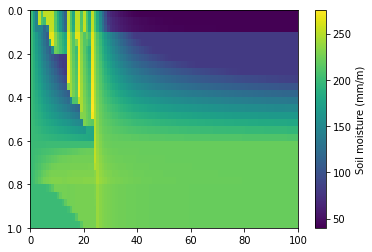

In [141]:
import matplotlib.pyplot as plt

plt.imshow(1000*theta, aspect='auto', interpolation='none', extent=(0, len(rain), 1, 0))
plt.colorbar(label='Soil moisture (mm/m)')

# References

Allen, R. G. et al. **Crop evapotranspiration**: Guidelines for computing crop water requirements. FAO Irrigation and drainage paper 56. FAO: Rome, 1998. Available at: <[https://www.fao.org/3/X0490E/X0490E00.htm](https://www.fao.org/3/X0490E/X0490E00.htm)>.